In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# <center>Dataset completo</center>

In [3]:
#Leitura do dataset completo
df = pd.read_csv('dados_disciplinas.txt', sep=',')

display(df)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
...,...,...,...,...,...,...,...
4637,827,2017,2,Reprovado,3,10,5
4638,828,2014,1,Reprovado por Frequencia,0,32,2
4639,829,2013,2,Reprovado por Frequencia,0,72,1
4640,830,2014,1,Reprovado por Frequencia,12,28,2


In [4]:
#Informações do dataset completo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MATR_ALUNO   4642 non-null   int64 
 1   ANO          4642 non-null   int64 
 2   PERIODO      4642 non-null   int64 
 3   SITUACAO     4642 non-null   object
 4   MEDIA_FINAL  4642 non-null   int64 
 5   NUM_FALTAS   4642 non-null   int64 
 6   DISCIPLINA   4642 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 254.0+ KB


In [5]:
#Contagem do parâmetro "ANO" para o dataset completo
print(df['ANO'].value_counts())

ANO
2016    997
2014    987
2013    957
2017    939
2015    762
Name: count, dtype: int64


In [6]:
#Contagem do parâmetro "PERIODO" para o dataset completo
print(df['PERIODO'].value_counts())

PERIODO
1    2365
2    2277
Name: count, dtype: int64


In [7]:
#Contagem do parâmetro "SITUACAO" para o dataset completo
print(df['SITUACAO'].value_counts())

SITUACAO
Aprovado                    2077
Reprovado                   1117
Reprovado por Frequencia     921
Dispensado                   456
Equivalencia curricular       37
Trancamento parcial           34
Name: count, dtype: int64


In [8]:
#Contagem do parâmetro "DISCIPLINA" para o dataset completo
print(df['DISCIPLINA'].value_counts())

DISCIPLINA
2    1209
5     982
4     914
3     778
1     759
Name: count, dtype: int64


# <center><span style="color:blue">Situação dos alunos de 2013</span></center>

In [9]:
#Leitura do dataset para o ano de 2013
df_2013 = df.loc[df['ANO'] == 2013]

display(df_2013)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
...,...,...,...,...,...,...,...
1289,254,2013,2,Dispensado,-1,-1,3
1290,254,2013,2,Dispensado,-1,-1,4
1291,254,2013,2,Dispensado,-1,-1,5
4639,829,2013,2,Reprovado por Frequencia,0,72,1


In [10]:
#Informações do dataset para o ano de 2013
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 4641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MATR_ALUNO   957 non-null    int64 
 1   ANO          957 non-null    int64 
 2   PERIODO      957 non-null    int64 
 3   SITUACAO     957 non-null    object
 4   MEDIA_FINAL  957 non-null    int64 
 5   NUM_FALTAS   957 non-null    int64 
 6   DISCIPLINA   957 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 59.8+ KB


In [11]:
#Contagem do parâmetro "PERIODO" para o dataset do ano de 2013
print(df_2013['PERIODO'].value_counts())

PERIODO
1    495
2    462
Name: count, dtype: int64


In [12]:
#Contagem do parâmetro "SITUACAO" para o dataset do ano de 2013
print(df_2013['SITUACAO'].value_counts())

SITUACAO
Aprovado                    372
Reprovado por Frequencia    259
Reprovado                   212
Dispensado                   96
Trancamento parcial          11
Equivalencia curricular       7
Name: count, dtype: int64


In [13]:
#Contagem do parâmetro "DISCIPLINA" para o dataset do ano de 2013
print(df_2013['DISCIPLINA'].value_counts())

DISCIPLINA
2    279
5    206
4    166
3    156
1    150
Name: count, dtype: int64


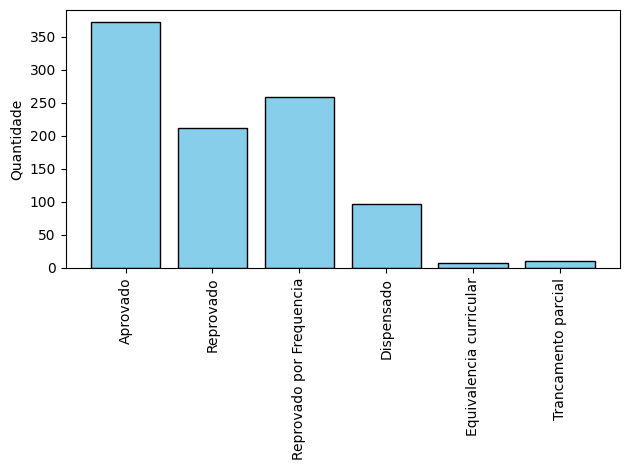

In [14]:
#Plotagem da situação do dataset para o ano de 2013
aprov = len(df_2013.loc[df_2013['SITUACAO'] == 'Aprovado'])
reprov = len(df_2013.loc[df_2013['SITUACAO'] == 'Reprovado'])
reprov_freq = len(df_2013.loc[df_2013['SITUACAO'] == 'Reprovado por Frequencia'])
disp = len(df_2013.loc[df_2013['SITUACAO'] == 'Dispensado'])
equiv_curr = len(df_2013.loc[df_2013['SITUACAO'] == 'Equivalencia curricular'])
tranc_parc = len(df_2013.loc[df_2013['SITUACAO'] == 'Trancamento parcial'])

categorias = ['Aprovado', 'Reprovado', 'Reprovado por Frequencia', 'Dispensado', 'Equivalencia curricular', 'Trancamento parcial']
valores = [aprov, reprov, reprov_freq, disp, equiv_curr, tranc_parc]
    
plt.bar(categorias, valores, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)
plt.ylabel('Quantidade')
plt.tight_layout()

In [15]:
#Seleção do primeiro periodo do dataset para o ano de 2013
df_2013_1 = df_2013.loc[df_2013['PERIODO'] == 1]

display(df_2013_1)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
7,6,2013,1,Reprovado por Frequencia,10,42,4
8,7,2013,1,Reprovado por Frequencia,10,45,2
...,...,...,...,...,...,...,...
820,188,2013,1,Dispensado,-1,-1,2
821,188,2013,1,Dispensado,-1,-1,3
822,188,2013,1,Reprovado por Frequencia,7,38,4
825,189,2013,1,Reprovado por Frequencia,0,22,2


In [16]:
#Seleção da disciplina 1 do primento periodo do ano de 2013
df_2013_1_disp_1 = df_2013_1.loc[df_2013_1['DISCIPLINA'] == 1]

display(df_2013_1_disp_1)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
1,2,2013,1,Reprovado por Frequencia,0,32,1
35,23,2013,1,Reprovado por Frequencia,0,31,1
52,30,2013,1,Reprovado por Frequencia,0,32,1
135,66,2013,1,Dispensado,-1,-1,1
171,79,2013,1,Reprovado por Frequencia,0,32,1
...,...,...,...,...,...,...,...
761,178,2013,1,Aprovado,82,2,1
767,179,2013,1,Aprovado,82,4,1
773,180,2013,1,Dispensado,-1,-1,1
782,182,2013,1,Aprovado,87,4,1


In [137]:
#Situação dos alunos na disciplina 1 do primeiro periodo no ano de 2013
print(df_2013_1_disp_1['SITUACAO'].value_counts())

SITUACAO
Aprovado                    60
Reprovado por Frequencia    12
Dispensado                   7
Reprovado                    2
Name: count, dtype: int64


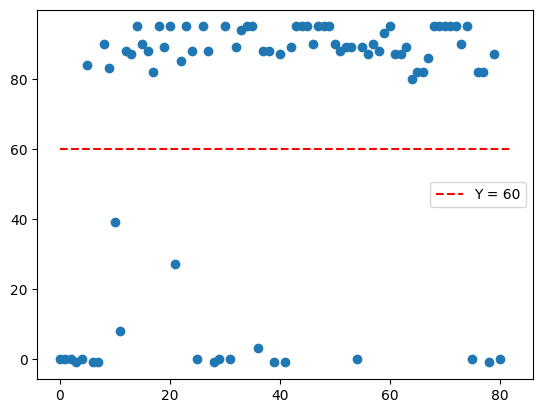

In [138]:
#Plotagem do comportamento das notas finais da disciplina 1 do primeiro periodo no ano de 2013
y_2013_1_disp1 = df_2013_1_disp_1['MEDIA_FINAL']

x_2013_1_disp1 = []
for i in range(len(df_2013_1_disp_1['MEDIA_FINAL'])):
    x_2013_1_disp1.append(i)

x = np.linspace(0, 82, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_1_disp1, y_2013_1_disp1)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [17]:
#Média da disciplina 1 do primento periodo do ano de 2013
media_2013_1_disp1 = df_2013_1_disp_1['MEDIA_FINAL'].mean()

print('A média para o 1º periodo de 2013 para a disciplina 1 é: ', media_2013_1_disp1)

A média para o 1º periodo de 2013 para a disciplina 1 é:  67.51851851851852


In [18]:
#Mediana da disciplina 1 do primeiro periodo do ano de 2013
mediana_2013_1_disp1 = df_2013_1_disp_1['MEDIA_FINAL'].median()

print('A mediana para o 1º periodo de 2013 para a disciplina 1 é: ', mediana_2013_1_disp1)

A mediana para o 1º periodo de 2013 para a disciplina 1 é:  88.0


In [19]:
#Desvio padrão da disciplina 1 do primeiro periodo no ano de 2013
std_2013_1_disp1 = df_2013_1_disp_1['MEDIA_FINAL'].std()

print('Desvio Padrão para o 1º periodo de 2013 para a disciplina 1 é: ', std_2013_1_disp1)

Desvio Padrão para o 1º periodo de 2013 para a disciplina 1 é:  38.74277710461368


In [21]:
#Seleção da disciplina 2 do primento periodo do ano de 2013
df_2013_1_disp_2 = df_2013_1.loc[df_2013_1['DISCIPLINA'] == 2]

display(df_2013_1_disp_2)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
8,7,2013,1,Reprovado por Frequencia,10,45,2
16,14,2013,1,Reprovado por Frequencia,16,24,2
22,18,2013,1,Reprovado por Frequencia,30,40,2
32,22,2013,1,Reprovado por Frequencia,33,22,2
...,...,...,...,...,...,...,...
795,184,2013,1,Reprovado por Frequencia,13,32,2
803,185,2013,1,Aprovado,85,8,2
811,187,2013,1,Dispensado,-1,-1,2
820,188,2013,1,Dispensado,-1,-1,2


In [135]:
#Situação dos alunos na disciplina 2 do primeiro periodo no ano de 2013
print(df_2013_1_disp_2['SITUACAO'].value_counts())

SITUACAO
Reprovado                   54
Reprovado por Frequencia    38
Aprovado                    37
Dispensado                  10
Trancamento parcial          3
Equivalencia curricular      2
Name: count, dtype: int64


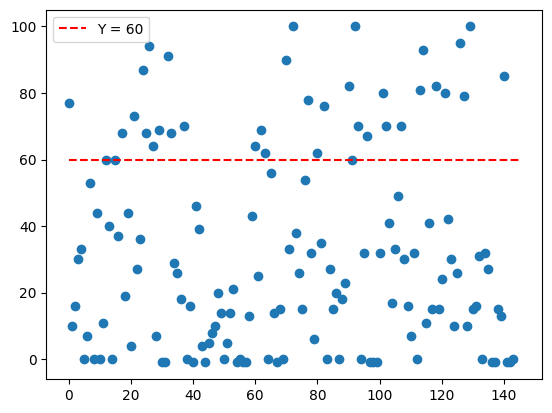

In [136]:
#Plotagem do comportamento das notas finais da disciplina 2 do primeiro periodo no ano de 2013
y_2013_1_disp2 = df_2013_1_disp_2['MEDIA_FINAL']

x_2013_1_disp2 = []
for i in range(len(df_2013_1_disp_2['MEDIA_FINAL'])):
    x_2013_1_disp2.append(i)

x = np.linspace(0, 145, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_1_disp2, y_2013_1_disp2)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [22]:
#Média da disciplina 2 do primento periodo do ano de 2013
media_2013_1_disp2 = df_2013_1_disp_2['MEDIA_FINAL'].mean()

print('A média para o 1º periodo de 2013 para a disciplina 2 é: ', media_2013_1_disp2)

A média para o 1º periodo de 2013 para a disciplina 2 é:  32.583333333333336


In [23]:
#Mediana da disciplina 2 do primeiro periodo do ano de 2013
mediana_2013_1_disp2 = df_2013_1_disp_2['MEDIA_FINAL'].median()

print('A mediana para o 1º periodo de 2013 para a disciplina 2 é: ', mediana_2013_1_disp2)

A mediana para o 1º periodo de 2013 para a disciplina 2 é:  26.0


In [24]:
#Desvio padrão da disciplina 2 do primeiro periodo no ano de 2013
std_2013_1_disp2 = df_2013_1_disp_2['MEDIA_FINAL'].std()

print('Desvio Padrão para o 1º periodo de 2013 para a disciplina 2 é: ', std_2013_1_disp2)

Desvio Padrão para o 1º periodo de 2013 para a disciplina 2 é:  30.11620849286998


In [26]:
#Seleção da disciplina 3 do primento periodo do ano de 2013
df_2013_1_disp_3 = df_2013_1.loc[df_2013_1['DISCIPLINA'] == 3]

display(df_2013_1_disp_3)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
75,39,2013,1,Reprovado por Frequencia,43,39,3
89,44,2013,1,Reprovado por Frequencia,45,20,3
109,52,2013,1,Reprovado por Frequencia,18,23,3
122,57,2013,1,Reprovado por Frequencia,28,26,3
137,66,2013,1,Dispensado,-1,-1,3
...,...,...,...,...,...,...,...
770,179,2013,1,Aprovado,78,12,3
779,181,2013,1,Dispensado,-1,-1,3
785,182,2013,1,Reprovado,53,14,3
812,187,2013,1,Dispensado,-1,-1,3


In [132]:
#Situação dos alunos na disciplina 3 do primeiro periodo no ano de 2013
print(df_2013_1_disp_3['SITUACAO'].value_counts())

SITUACAO
Aprovado                    50
Reprovado por Frequencia    19
Dispensado                   8
Reprovado                    4
Name: count, dtype: int64


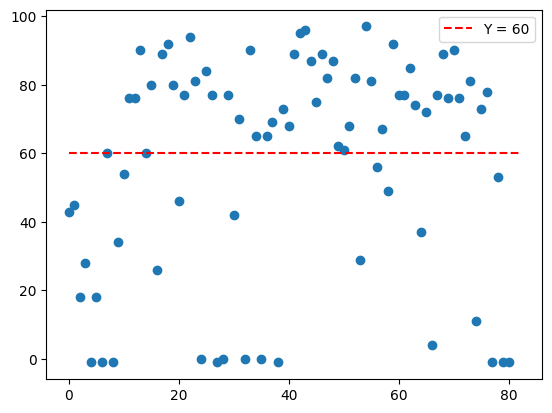

In [134]:
#Plotagem do comportamento das notas finais da disciplina 3 do primeiro periodo no ano de 2013
y_2013_1_disp3 = df_2013_1_disp_3['MEDIA_FINAL']

x_2013_1_disp3 = []
for i in range(len(df_2013_1_disp_3['MEDIA_FINAL'])):
    x_2013_1_disp3.append(i)

x = np.linspace(0, 82, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_1_disp3, y_2013_1_disp3)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [27]:
#Média da disciplina 3 do primento periodo do ano de 2013
media_2013_1_disp3 = df_2013_1_disp_3['MEDIA_FINAL'].mean()

print('A média para o 1º periodo de 2013 para a disciplina 3 é: ', media_2013_1_disp3)

A média para o 1º periodo de 2013 para a disciplina 3 é:  57.75308641975309


In [28]:
#Mediana da disciplina 3 do primeiro periodo do ano de 2013
mediana_2013_1_disp3 = df_2013_1_disp_3['MEDIA_FINAL'].median()

print('A mediana para o 1º periodo de 2013 para a disciplina 3 é: ', mediana_2013_1_disp3)

A mediana para o 1º periodo de 2013 para a disciplina 3 é:  70.0


In [29]:
#Desvio padrão da disciplina 3 do primeiro periodo no ano de 2013
std_2013_1_disp3 = df_2013_1_disp_3['MEDIA_FINAL'].std()

print('Desvio Padrão para o 1º periodo de 2013 para a disciplina 3 é: ', std_2013_1_disp3)

Desvio Padrão para o 1º periodo de 2013 para a disciplina 3 é:  31.96816027870447


In [31]:
#Seleção da disciplina 4 do primento periodo do ano de 2013
df_2013_1_disp_4 = df_2013_1.loc[df_2013_1['DISCIPLINA'] == 4]

display(df_2013_1_disp_4)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
2,3,2013,1,Reprovado por Frequencia,0,50,4
7,6,2013,1,Reprovado por Frequencia,10,42,4
12,10,2013,1,Reprovado por Frequencia,28,50,4
27,20,2013,1,Equivalencia curricular,-1,-1,4
38,23,2013,1,Reprovado por Frequencia,0,48,4
...,...,...,...,...,...,...,...
771,179,2013,1,Aprovado,61,6,4
775,180,2013,1,Dispensado,-1,-1,4
787,182,2013,1,Reprovado,31,8,4
813,187,2013,1,Aprovado,78,12,4


In [130]:
#Situação dos alunos na disciplina 4 do primeiro periodo no ano de 2013
print(df_2013_1_disp_4['SITUACAO'].value_counts())

SITUACAO
Reprovado por Frequencia    37
Aprovado                    26
Reprovado                   20
Dispensado                   6
Equivalencia curricular      2
Trancamento parcial          1
Name: count, dtype: int64


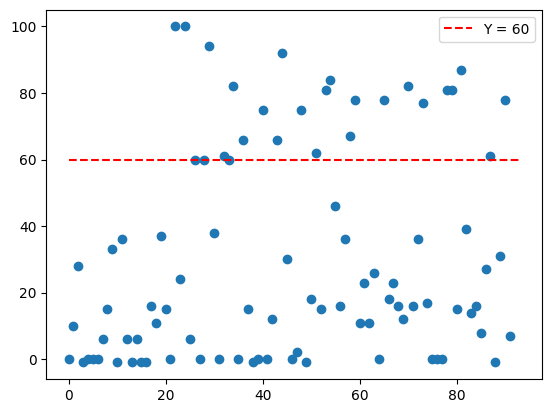

In [131]:
#Plotagem do comportamento das notas finais da disciplina 4 do primeiro periodo no ano de 2013
y_2013_1_disp4 = df_2013_1_disp_4['MEDIA_FINAL']

x_2013_1_disp4 = []
for i in range(len(df_2013_1_disp_4['MEDIA_FINAL'])):
    x_2013_1_disp4.append(i)

x = np.linspace(0, 93, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_1_disp4, y_2013_1_disp4)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [32]:
#Média da disciplina 4 do primento periodo do ano de 2013
media_2013_1_disp4 = df_2013_1_disp_4['MEDIA_FINAL'].mean()

print('A média para o 1º periodo de 2013 para a disciplina 4 é: ', media_2013_1_disp4)

A média para o 1º periodo de 2013 para a disciplina 4 é:  30.684782608695652


In [33]:
#Mediana da disciplina 4 do primeiro periodo do ano de 2013
mediana_2013_1_disp4 = df_2013_1_disp_4['MEDIA_FINAL'].median()

print('A mediana para o 1º periodo de 2013 para a disciplina 4 é: ', mediana_2013_1_disp4)

A mediana para o 1º periodo de 2013 para a disciplina 4 é:  16.0


In [34]:
#Desvio padrão da disciplina 4 do primeiro periodo no ano de 2013
std_2013_1_disp4 = df_2013_1_disp_4['MEDIA_FINAL'].std()

print('Desvio Padrão para o 1º periodo de 2013 para a disciplina 4 é: ', std_2013_1_disp4)

Desvio Padrão para o 1º periodo de 2013 para a disciplina 4 é:  31.591461270839417


In [36]:
#Seleção da disciplina 5 do primento periodo do ano de 2013
df_2013_1_disp_5 = df_2013_1.loc[df_2013_1['DISCIPLINA'] == 5]

display(df_2013_1_disp_5)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
48,27,2013,1,Reprovado por Frequencia,0,72,5
79,40,2013,1,Reprovado por Frequencia,0,64,5
102,47,2013,1,Aprovado,72,14,5
116,53,2013,1,Aprovado,72,14,5
124,57,2013,1,Aprovado,64,10,5
...,...,...,...,...,...,...,...
776,180,2013,1,Dispensado,-1,-1,5
788,182,2013,1,Reprovado,20,2,5
793,183,2013,1,Aprovado,87,6,5
810,186,2013,1,Aprovado,79,8,5


In [127]:
#Situação dos alunos na disciplina 5 do primeiro periodo no ano de 2013
print(df_2013_1_disp_5['SITUACAO'].value_counts())

SITUACAO
Aprovado                    45
Reprovado                   25
Reprovado por Frequencia    16
Dispensado                   8
Trancamento parcial          2
Equivalencia curricular      1
Name: count, dtype: int64


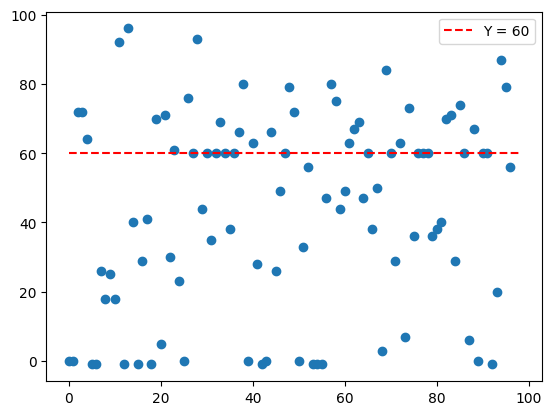

In [129]:
#Plotagem do comportamento das notas finais da disciplina 5 do primeiro periodo no ano de 2013
y_2013_1_disp5 = df_2013_1_disp_5['MEDIA_FINAL']

x_2013_1_disp5 = []
for i in range(len(df_2013_1_disp_5['MEDIA_FINAL'])):
    x_2013_1_disp5.append(i)

x = np.linspace(0, 98, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_1_disp5, y_2013_1_disp5)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [37]:
#Média da disciplina 5 do primento periodo do ano de 2013
media_2013_1_disp5 = df_2013_1_disp_5['MEDIA_FINAL'].mean()

print('A média para o 1º periodo de 2013 para a disciplina 5 é: ', media_2013_1_disp5)

A média para o 1º periodo de 2013 para a disciplina 5 é:  43.845360824742265


In [38]:
#Mediana da disciplina 5 do primeiro periodo do ano de 2013
mediana_2013_1_disp5 = df_2013_1_disp_5['MEDIA_FINAL'].median()

print('A mediana para o 1º periodo de 2013 para a disciplina 5 é: ', mediana_2013_1_disp5)

A mediana para o 1º periodo de 2013 para a disciplina 5 é:  49.0


In [39]:
#Desvio padrão da disciplina 5 do primeiro periodo no ano de 2013
std_2013_1_disp5 = df_2013_1_disp_5['MEDIA_FINAL'].std()

print('Desvio Padrão para o 1º periodo de 2013 para a disciplina 5 é: ', std_2013_1_disp5)

Desvio Padrão para o 1º periodo de 2013 para a disciplina 5 é:  28.61575185619858


In [41]:
#Seleção do segundo periodo do dataset para o ano de 2013
df_2013_2 = df_2013.loc[df_2013['PERIODO'] == 2]

display(df_2013_2)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
5,5,2013,2,Aprovado,60,4,2
9,8,2013,2,Equivalencia curricular,-1,-1,4
10,9,2013,2,Reprovado por Frequencia,0,66,3
...,...,...,...,...,...,...,...
1289,254,2013,2,Dispensado,-1,-1,3
1290,254,2013,2,Dispensado,-1,-1,4
1291,254,2013,2,Dispensado,-1,-1,5
4639,829,2013,2,Reprovado por Frequencia,0,72,1


In [42]:
#Seleção da disciplina 1 do segundo periodo do ano de 2013
df_2013_2_disp_1 = df_2013_2.loc[df_2013_2['DISCIPLINA'] == 1]

display(df_2013_2_disp_1)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
53,30,2013,2,Reprovado por Frequencia,0,72,1
125,58,2013,2,Reprovado por Frequencia,0,72,1
198,85,2013,2,Aprovado,90,10,1
236,93,2013,2,Reprovado por Frequencia,5,58,1
457,137,2013,2,Reprovado por Frequencia,0,72,1
...,...,...,...,...,...,...,...
1253,249,2013,2,Reprovado por Frequencia,0,72,1
1264,250,2013,2,Aprovado,84,2,1
1287,254,2013,2,Dispensado,-1,-1,1
4639,829,2013,2,Reprovado por Frequencia,0,72,1


In [125]:
#Situação dos alunos na disciplina 1 do segundo periodo no ano de 2013
print(df_2013_2_disp_1['SITUACAO'].value_counts())

SITUACAO
Aprovado                    37
Reprovado por Frequencia    17
Dispensado                  13
Reprovado                    1
Trancamento parcial          1
Name: count, dtype: int64


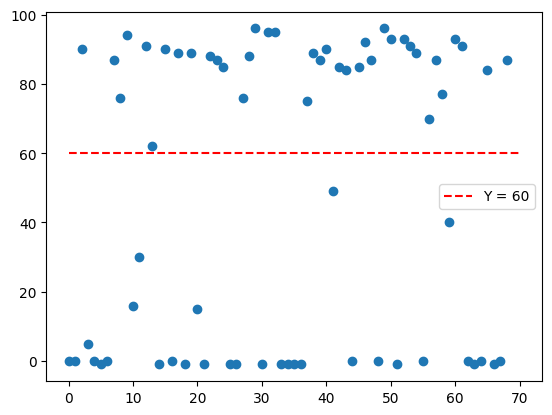

In [126]:
#Plotagem do comportamento das notas finais da disciplina 1 do segundo periodo no ano de 2013
y_2013_2_disp1 = df_2013_2_disp_1['MEDIA_FINAL']

x_2013_2_disp1 = []
for i in range(len(df_2013_2_disp_1['MEDIA_FINAL'])):
    x_2013_2_disp1.append(i)

x = np.linspace(0, 70, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_2_disp1, y_2013_2_disp1)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [43]:
#Média da disciplina 1 do segundo periodo do ano de 2013
media_2013_2_disp1 = df_2013_2_disp_1['MEDIA_FINAL'].mean()

print('A média para o 2º periodo de 2013 para a disciplina 1 é: ', media_2013_2_disp1)

A média para o 2º periodo de 2013 para a disciplina 1 é:  49.91304347826087


In [44]:
#Mediana da disciplina 1 do segundo periodo do ano de 2013
mediana_2013_2_disp1 = df_2013_2_disp_1['MEDIA_FINAL'].median()

print('A mediana para o 2º periodo de 2013 para a disciplina 1 é: ', mediana_2013_2_disp1)

A mediana para o 2º periodo de 2013 para a disciplina 1 é:  76.0


In [45]:
#Desvio padrão da disciplina 1 do segundo periodo no ano de 2013
std_2013_2_disp1 = df_2013_2_disp_1['MEDIA_FINAL'].std()

print('Desvio Padrão para o 2º periodo de 2013 para a disciplina 1 é: ', std_2013_2_disp1)

Desvio Padrão para o 2º periodo de 2013 para a disciplina 1 é:  42.46373509188711


In [47]:
#Seleção da disciplina 2 do segundo periodo do ano de 2013
df_2013_2_disp_2 = df_2013_2.loc[df_2013_2['DISCIPLINA'] == 2]

display(df_2013_2_disp_2)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
3,4,2013,2,Aprovado,60,2,2
5,5,2013,2,Aprovado,60,4,2
23,18,2013,2,Reprovado por Frequencia,0,54,2
28,21,2013,2,Reprovado por Frequencia,6,42,2
33,22,2013,2,Reprovado por Frequencia,0,52,2
...,...,...,...,...,...,...,...
1256,249,2013,2,Reprovado por Frequencia,0,44,2
1265,250,2013,2,Reprovado,36,4,2
1274,251,2013,2,Reprovado,0,12,2
1280,252,2013,2,Dispensado,-1,-1,2


In [123]:
#Situação dos alunos na disciplina 2 do segundo periodo no ano de 2013
print(df_2013_2_disp_2['SITUACAO'].value_counts())

SITUACAO
Reprovado por Frequencia    51
Reprovado                   38
Aprovado                    31
Dispensado                  13
Trancamento parcial          2
Name: count, dtype: int64


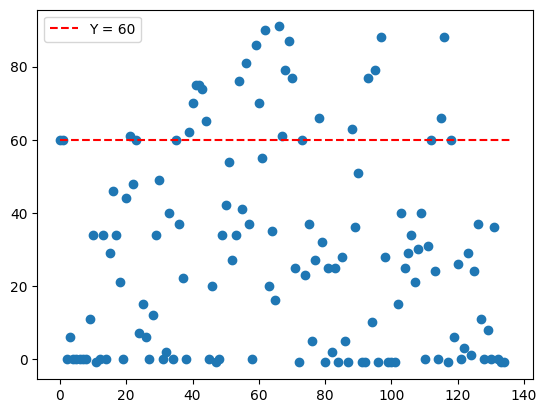

In [124]:
#Plotagem do comportamento das notas finais da disciplina 2 do segundo periodo no ano de 2013
y_2013_2_disp2 = df_2013_2_disp_2['MEDIA_FINAL']

x_2013_2_disp2 = []
for i in range(len(df_2013_2_disp_2['MEDIA_FINAL'])):
    x_2013_2_disp2.append(i)

x = np.linspace(0, 136, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_2_disp2, y_2013_2_disp2)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [48]:
#Média da disciplina 2 do segundo periodo do ano de 2013
media_2013_2_disp2 = df_2013_2_disp_2['MEDIA_FINAL'].mean()

print('A média para o 2º periodo de 2013 para a disciplina 2 é: ', media_2013_2_disp2)

A média para o 2º periodo de 2013 para a disciplina 2 é:  29.533333333333335


In [49]:
#Mediana da disciplina 2 do segundo periodo do ano de 2013
mediana_2013_2_disp2 = df_2013_2_disp_2['MEDIA_FINAL'].median()

print('A mediana para o 2º periodo de 2013 para a disciplina 2 é: ', mediana_2013_2_disp2)

A mediana para o 2º periodo de 2013 para a disciplina 2 é:  26.0


In [50]:
#Desvio padrão da disciplina 2 do segundo periodo no ano de 2013
std_2013_2_disp2 = df_2013_2_disp_2['MEDIA_FINAL'].std()

print('Desvio Padrão para o 2º periodo de 2013 para a disciplina 2 é: ', std_2013_2_disp2)

Desvio Padrão para o 2º periodo de 2013 para a disciplina 2 é:  28.067296526889763


In [52]:
#Seleção da disciplina 3 do segundo periodo do ano de 2013
df_2013_2_disp_3 = df_2013_2.loc[df_2013_2['DISCIPLINA'] == 3]

display(df_2013_2_disp_3)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
10,9,2013,2,Reprovado por Frequencia,0,66,3
76,39,2013,2,Aprovado,60,18,3
90,44,2013,2,Reprovado por Frequencia,0,68,3
123,57,2013,2,Reprovado por Frequencia,0,60,3
157,74,2013,2,Aprovado,86,10,3
...,...,...,...,...,...,...,...
1240,247,2013,2,Reprovado por Frequencia,0,68,3
1249,248,2013,2,Trancamento parcial,-1,-1,3
1258,249,2013,2,Reprovado por Frequencia,0,68,3
1267,250,2013,2,Aprovado,60,2,3


In [120]:
#Situação dos alunos na disciplina 3 do segundo periodo no ano de 2013
print(df_2013_2_disp_3['SITUACAO'].value_counts())

SITUACAO
Aprovado                    41
Reprovado por Frequencia    12
Dispensado                  11
Reprovado                   10
Trancamento parcial          1
Name: count, dtype: int64


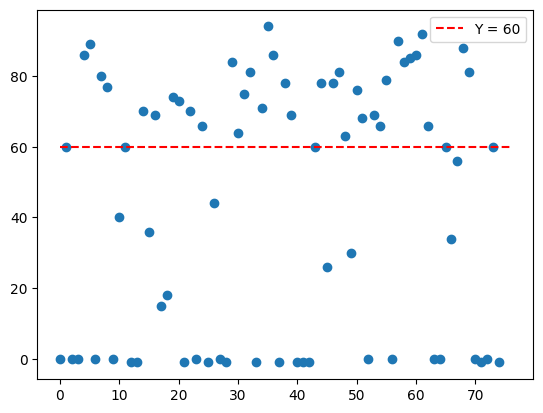

In [122]:
#Plotagem do comportamento das notas finais da disciplina 3 do segundo periodo no ano de 2013
y_2013_2_disp3 = df_2013_2_disp_3['MEDIA_FINAL']

x_2013_2_disp3 = []
for i in range(len(df_2013_2_disp_3['MEDIA_FINAL'])):
    x_2013_2_disp3.append(i)

x = np.linspace(0, 76, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_2_disp3, y_2013_2_disp3)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [53]:
#Média da disciplina 3 do segundo periodo do ano de 2013
media_2013_2_disp3 = df_2013_2_disp_3['MEDIA_FINAL'].mean()

print('A média para o 2º periodo de 2013 para a disciplina 3 é: ', media_2013_2_disp3)

A média para o 2º periodo de 2013 para a disciplina 3 é:  44.973333333333336


In [54]:
#Mediana da disciplina 3 do segundo periodo do ano de 2013
mediana_2013_2_disp3 = df_2013_2_disp_3['MEDIA_FINAL'].median()

print('A mediana para o 2º periodo de 2013 para a disciplina 3 é: ', mediana_2013_2_disp3)

A mediana para o 2º periodo de 2013 para a disciplina 3 é:  60.0


In [55]:
#Desvio padrão da disciplina 3 do segundo periodo no ano de 2013
std_2013_2_disp3 = df_2013_2_disp_3['MEDIA_FINAL'].std()

print('Desvio Padrão para o 2º periodo de 2013 para a disciplina 3 é: ', std_2013_2_disp3)

Desvio Padrão para o 2º periodo de 2013 para a disciplina 3 é:  35.97069878625061


In [57]:
#Seleção da disciplina 4 do segundo periodo do ano de 2013
df_2013_2_disp_4 = df_2013_2.loc[df_2013_2['DISCIPLINA'] == 4]

display(df_2013_2_disp_4)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
9,8,2013,2,Equivalencia curricular,-1,-1,4
19,17,2013,2,Reprovado por Frequencia,0,38,4
24,18,2013,2,Reprovado por Frequencia,0,64,4
44,26,2013,2,Reprovado por Frequencia,0,58,4
55,31,2013,2,Aprovado,63,18,4
...,...,...,...,...,...,...,...
1242,247,2013,2,Reprovado,0,10,4
1250,248,2013,2,Trancamento parcial,-1,-1,4
1260,249,2013,2,Reprovado por Frequencia,0,22,4
1268,250,2013,2,Reprovado,23,4,4


In [119]:
#Situação dos alunos na disciplina 4 do segundo periodo no ano de 2013
print(df_2013_2_disp_4['SITUACAO'].value_counts())

SITUACAO
Reprovado                   22
Reprovado por Frequencia    21
Aprovado                    19
Dispensado                  10
Equivalencia curricular      1
Trancamento parcial          1
Name: count, dtype: int64


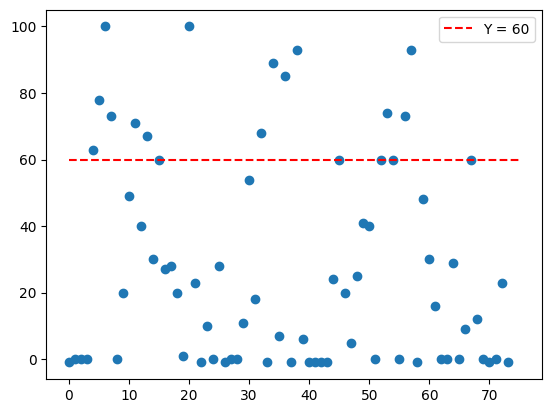

In [118]:
#Plotagem do comportamento das notas finais da disciplina 4 do segundo periodo no ano de 2013
y_2013_2_disp4 = df_2013_2_disp_4['MEDIA_FINAL']

x_2013_2_disp4 = []
for i in range(len(df_2013_2_disp_4['MEDIA_FINAL'])):
    x_2013_2_disp4.append(i)

x = np.linspace(0, 75, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_2_disp4, y_2013_2_disp4)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [58]:
#Média da disciplina 4 do segundo periodo do ano de 2013
media_2013_2_disp4 = df_2013_2_disp_4['MEDIA_FINAL'].mean()

print('A média para o 2º periodo de 2013 para a disciplina 4 é: ', media_2013_2_disp4)

A média para o 2º periodo de 2013 para a disciplina 4 é:  28.5


In [59]:
#Mediana da disciplina 4 do segundo periodo do ano de 2013
mediana_2013_2_disp4 = df_2013_2_disp_4['MEDIA_FINAL'].median()

print('A mediana para o 2º periodo de 2013 para a disciplina 4 é: ', mediana_2013_2_disp4)

A mediana para o 2º periodo de 2013 para a disciplina 4 é:  20.0


In [60]:
#Desvio padrão da disciplina 4 do segundo periodo no ano de 2013
std_2013_2_disp4 = df_2013_2_disp_4['MEDIA_FINAL'].std()

print('Desvio Padrão para o 2º periodo de 2013 para a disciplina 4 é: ', std_2013_2_disp4)

Desvio Padrão para o 2º periodo de 2013 para a disciplina 4 é:  31.56348245453176


In [62]:
#Seleção da disciplina 5 do segundo periodo do ano de 2013
df_2013_2_disp_5 = df_2013_2.loc[df_2013_2['DISCIPLINA'] == 5]

display(df_2013_2_disp_5)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
4,4,2013,2,Aprovado,68,2,5
11,9,2013,2,Reprovado por Frequencia,0,66,5
13,11,2013,2,Reprovado por Frequencia,12,32,5
20,17,2013,2,Reprovado,27,4,5
25,18,2013,2,Reprovado por Frequencia,10,32,5
...,...,...,...,...,...,...,...
1269,250,2013,2,Reprovado,24,2,5
1278,251,2013,2,Reprovado,8,10,5
1281,252,2013,2,Reprovado por Frequencia,0,28,5
1285,253,2013,2,Reprovado por Frequencia,0,20,5


In [112]:
#Situação dos alunos na disciplina 5 do segundo periodo no ano de 2013
print(df_2013_2_disp_5['SITUACAO'].value_counts())

SITUACAO
Reprovado por Frequencia    36
Reprovado                   36
Aprovado                    26
Dispensado                  10
Equivalencia curricular      1
Name: count, dtype: int64


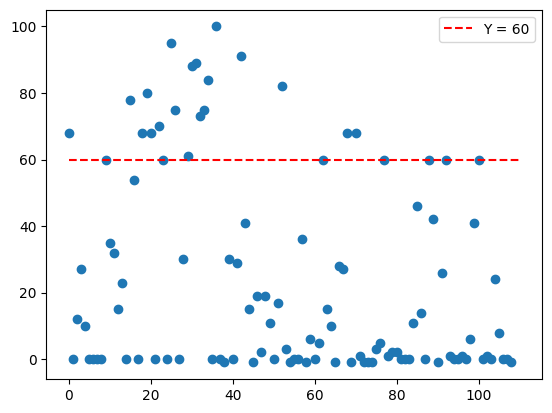

In [76]:
#Plotagem do comportamento das notas finais da disciplina 5 do segundo periodo no ano de 2013
y_2013_2_disp5 = df_2013_2_disp_5['MEDIA_FINAL']

x_2013_2_disp5 = []
for i in range(len(df_2013_2_disp_5['MEDIA_FINAL'])):
    x_2013_2_disp5.append(i)

x = np.linspace(0, 110, 50)
altura_constante = 60
y_horizontal = np.full(len(x), altura_constante)

plt.scatter(x_2013_2_disp5, y_2013_2_disp5)
plt.plot(x, y_horizontal, 'r--', label=f'Y = {altura_constante}')
plt.legend()

In [63]:
#Média da disciplina 5 do segundo periodo do ano de 2013
media_2013_2_disp5 = df_2013_2_disp_5['MEDIA_FINAL'].mean()

print('A média para o 2º periodo de 2013 para a disciplina 5 é: ', media_2013_2_disp5)

A média para o 2º periodo de 2013 para a disciplina 5 é:  24.55045871559633


In [64]:
#Mediana da disciplina 5 do segundo periodo do ano de 2013
mediana_2013_2_disp5 = df_2013_2_disp_5['MEDIA_FINAL'].median()

print('A mediana para o 2º periodo de 2013 para a disciplina 5 é: ', mediana_2013_2_disp5)

A mediana para o 2º periodo de 2013 para a disciplina 5 é:  10.0


In [65]:
#Desvio padrão da disciplina 5 do segundo periodo no ano de 2013
std_2013_2_disp5 = df_2013_2_disp_5['MEDIA_FINAL'].std()

print('Desvio Padrão para o 2º periodo de 2013 para a disciplina 5 é: ', std_2013_2_disp5)

Desvio Padrão para o 2º periodo de 2013 para a disciplina 5 é:  30.44803899254163


# <center>Situação dos alunos de 2014</center>

# <center>Situação dos alunos de 2015</center>

# <center>Situação dos alunos de 2016</center>

# <center>Situação dos alunos de 2017</center>